# Lab 2

### linear Regression

# steps for solving a problem with machine learning
1) Data Cleaning
2) EDA
4) Model Building
5) Evaluation
6) Improvement

### Data import and checking for missing data and renaming

In [63]:
!pip install statsmodels


In [64]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [65]:
df = pd.read_csv("/Nerdchanojas/CACSC16/TempForecast/Bias_correction_ucl.csv")

In [66]:
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax   
0      1.0  2013-06-30          28.7          21.4    58.255688    91.116364  \
1      2.0  2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0  2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0  2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0  2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2   
0         28.074101         23.006936  6.818887   69.451805  ...         0.0  \
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope   
0         0.0         0.0  37.6046  126.991  212.3350  2.7850  \
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [67]:
df.shape

(7752, 25)

In [68]:
df.sample

<bound method NDFrame.sample of       station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin   
0         1.0  2013-06-30          28.7          21.4    58.255688  \
1         2.0  2013-06-30          31.9          21.6    52.263397   
2         3.0  2013-06-30          31.6          23.3    48.690479   
3         4.0  2013-06-30          32.0          23.4    58.239788   
4         5.0  2013-06-30          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  2017-08-30          23.3          17.1    26.741310   
7748     24.0  2017-08-30          23.3          17.7    24.040634   
7749     25.0  2017-08-30          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH   
0       91.116364         28.074101         23.

In [69]:
df.info

<bound method DataFrame.info of       station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin   
0         1.0  2013-06-30          28.7          21.4    58.255688  \
1         2.0  2013-06-30          31.9          21.6    52.263397   
2         3.0  2013-06-30          31.6          23.3    48.690479   
3         4.0  2013-06-30          32.0          23.4    58.239788   
4         5.0  2013-06-30          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  2017-08-30          23.3          17.1    26.741310   
7748     24.0  2017-08-30          23.3          17.7    24.040634   
7749     25.0  2017-08-30          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH   
0       91.116364         28.074101         23.

Data to consider:-
1) Present_Tmax
2) Present_Tmin
3) LDAPS_RHmin
4) LDAPS_RHmax
5) LDAPS_Tmax_lapse
6) LDAPS_Tmin_lapse
7) LDAPS_WS
8) LDAPS_LH
9) LDAPS_CC1
10) DEM-Evelvation (m)
11) Slope
12) Solar Radiation
LDAPS - LDAPS enables smaller-scale numerical simulations within the atmospheric boundary layer by providing realistic initial and boundary conditions for numerical models with computational fluid dynamics models

In [70]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [71]:
df.drop( columns= ['station', 'Date', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon'] ,inplace=True)

In [72]:
df.sample


<bound method NDFrame.sample of       Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse   
0             28.7          21.4    58.255688    91.116364         28.074101  \
1             31.9          21.6    52.263397    90.604721         29.850689   
2             31.6          23.3    48.690479    83.973587         30.091292   
3             32.0          23.4    58.239788    96.483688         29.704629   
4             31.4          21.9    56.174095    90.155128         29.113934   
...            ...           ...          ...          ...               ...   
7747          23.3          17.1    26.741310    78.869858         26.352081   
7748          23.3          17.7    24.040634    77.294975         27.010193   
7749          23.2          17.4    22.933014    77.243744         27.939516   
7750          20.0          11.3    19.794666    58.936283         17.624954   
7751          37.6          29.9    98.524734   100.000153         38.542255   

      L

In [73]:
df.columns

Index(['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax',
       'Next_Tmin'],
      dtype='object')

In [74]:
df.rename(columns = {'Present_Tmax': 'PTmax',
                    'Present_Tmin': 'PTmin',
                     'LDAPS_RHmin': 'RHmin',
                     'LDAPS_RHmax': 'RHmax',
                     'LDAPS_Tmax_lapse': 'TmaxL',
                    'LDAPS_Tmin_lapse': 'TminL',
                     'LDAPS_WS': 'WS',
                     'LDAPS_LH': 'LH',
                     'LDAPS_CC1': 'CC'}, inplace=True)

In [120]:
X = df[['PTmax', 'PTmin', 'RHmin', 'RHmax',
       'TmaxL', 'TminL', 'WS', 'LH',
       'CC', 'DEM', 'Slope', 'Solar radiation']]
Y = df['Next_Tmax']

In [121]:
X

PTmax  PTmin      RHmin       RHmax      TmaxL      TminL         WS   
0      28.7   21.4  58.255688   91.116364  28.074101  23.006936   6.818887  \
1      31.9   21.6  52.263397   90.604721  29.850689  24.035009   5.691890   
2      31.6   23.3  48.690479   83.973587  30.091292  24.565633   6.138224   
3      32.0   23.4  58.239788   96.483688  29.704629  23.326177   5.650050   
4      31.4   21.9  56.174095   90.155128  29.113934  23.486480   5.735004   
...     ...    ...        ...         ...        ...        ...        ...   
7747   23.3   17.1  26.741310   78.869858  26.352081  18.775678   6.148918   
7748   23.3   17.7  24.040634   77.294975  27.010193  18.733519   6.542819   
7749   23.2   17.4  22.933014   77.243744  27.939516  18.522965   7.289264   
7750   20.0   11.3  19.794666   58.936283  17.624954  14.272646   2.882580   
7751   37.6   29.9  98.524734  100.000153  38.542255  29.619342  21.857621   

              LH        CC       DEM     Slope  Solar radiation  
0      69.451805  0.233947  212.3350  2.785000      5992.895996  
1      51.937448  0.225508   44.7624  0.514100      5869.312500  
2      20.573050  0.209344   33.3068  0.266100      5863.555664  
3      65.727144  0.216372   45.7160  2.534800      5856.964844  
4     107.965535  0.151407   35.0380  0.505500      5859.552246  
...          ...       ...       ...       ...              ...  
7747   72.058294  0.030034   15.5876  0.155400      4443.313965  
7748   47.241457  0.035874   17.2956  0.222300      4438.373535  
7749    9.090034  0.048954   19.5844  0.271300      4451.345215  
7750  -13.603212  0.000000   12.3700  0.098475      4329.520508  
7751  213.414006  0.967277  212.3350  5.178230      5992.895996  

[7752 rows x 12 columns]

In [122]:
X.shape

(7752, 12)

In [77]:
Y

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7747    28.3
7748    28.6
7749    27.8
7750    17.4
7751    38.9
Name: Next_Tmax, Length: 7752, dtype: float64

In [78]:
X.isnull().sum()

PTmax              0
PTmin              0
RHmin              0
RHmax              0
TmaxL              0
TminL              0
WS                 0
LH                 0
CC                 0
DEM                0
Slope              0
Solar radiation    0
Next_Tmax          0
Next_Tmin          0
dtype: int64

In [79]:
Y.isnull().sum()

27

In [80]:
Y = Y.fillna(Y.median())

In [81]:
X.duplicated().sum()

0

In [82]:
Y.duplicated().sum()

7569

### EDA

In [83]:
X[['PTmax', 'PTmin', 'RHmin', 'RHmax', 'TmaxL', 'TminL', 'WS', 'LH', 'CC', 'DEM', 'Slope', 'Solar radiation']].describe()

PTmax      PTmin      RHmin      RHmax      TmaxL      TminL   
count  11.000000  11.000000  11.000000  11.000000  11.000000  11.000000  \
mean   31.427273  22.645455  54.347306  86.334992  29.014203  23.690219   
std     0.938180   1.211085   3.131709   5.430793   0.799172   0.623950   
min    28.700000  20.500000  48.690479  78.004539  27.576705  22.527018   
25%    31.400000  21.750000  52.294807  82.496674  28.489417  23.329275   
50%    31.600000  23.300000  55.338791  85.385635  29.113934  23.819054   
75%    31.900000  23.500000  56.469196  90.379925  29.699677  24.136738   
max    32.100000  24.400000  58.255688  96.483688  30.091292  24.565633   

              WS          LH         CC         DEM      Slope   
count  11.000000   11.000000  11.000000   11.000000  11.000000  \
mean    6.077790   66.983208   0.263791   70.802073   1.329691   
std     0.395526   29.702518   0.093286   70.116953   1.586481   
min     5.587135   20.573050   0.151407   12.370000   0.098500   
25%     5.713447   51.084418   0.197311   34.172400   0.339300   
50%     6.104417   63.006075   0.225508   45.716000   0.514100   
75%     6.297054   77.281388   0.353074   53.578200   2.048850   
max     6.818887  125.110007   0.408766  212.335000   5.178200   

       Solar radiation  
count        11.000000  
mean       5878.527122  
std          39.682845  
min        5849.233398  
25%        5861.553955  
50%        5864.000977  
75%        5875.341065  
max        5992.895996

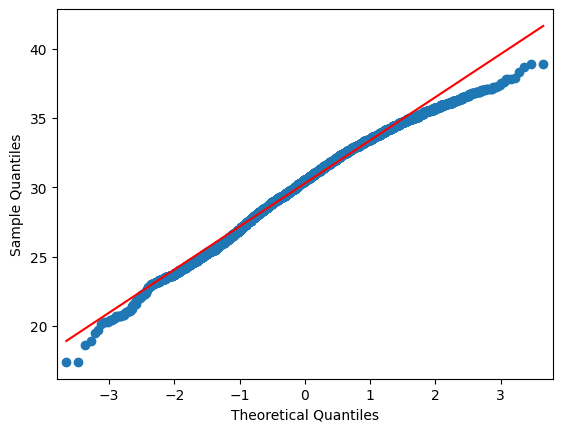

In [84]:
import numpy as np
import statsmodels.api as sm
import pylab as py	

sm.qqplot(Y, line ='r')
py.show()


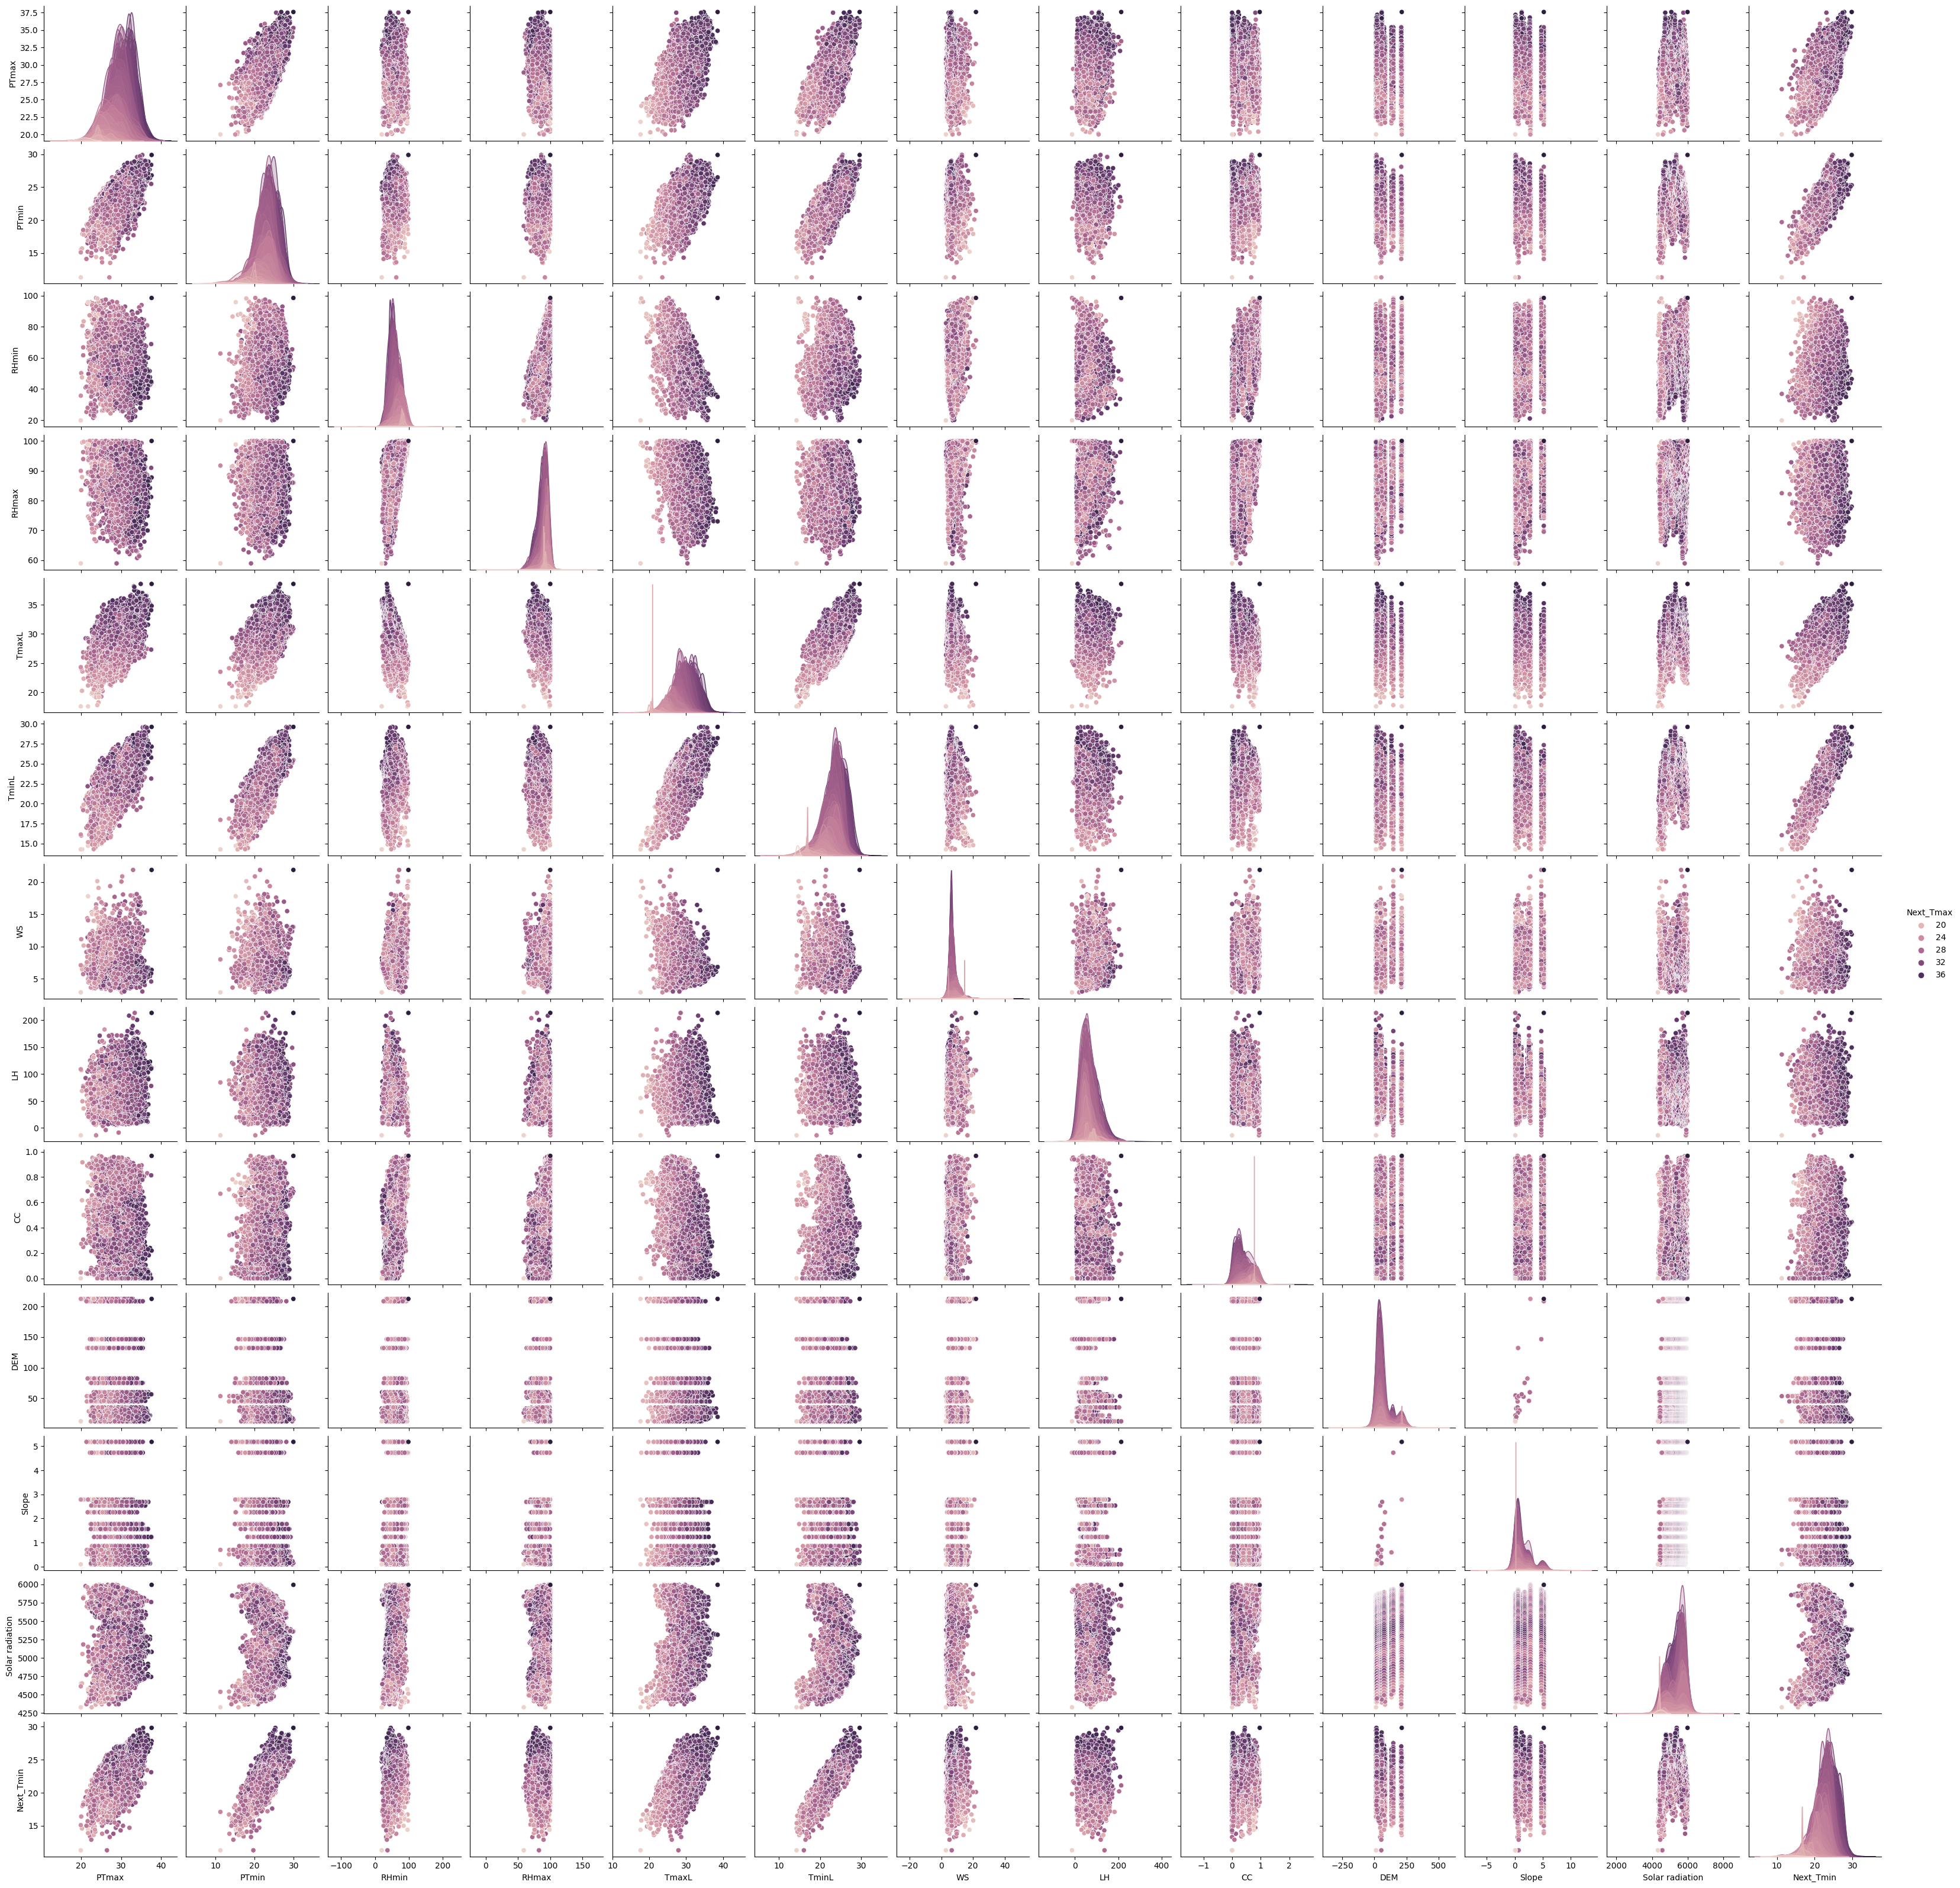

In [85]:
sns.pairplot(df, hue='Next_Tmax')

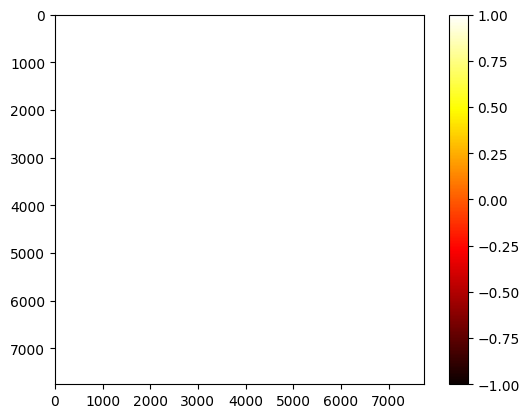

In [86]:
correlation_matrix = np.corrcoef(df)
plt.imshow(correlation_matrix, cmap='hot', vmin=-1, vmax=1)
plt.colorbar()
plt.show()


### Model Building and Test Train Splitting

In [130]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [106]:
Xa = np.array(X)
Xa

array([[2.87000000e+01, 2.14000000e+01, 5.82556877e+01, 9.11163635e+01,
        2.80741015e+01, 2.30069362e+01, 6.81888697e+00, 6.94518053e+01,
        2.33947471e-01, 2.12335000e+02, 2.78500000e+00, 5.99289600e+03,
        2.91000000e+01, 2.12000000e+01],
       [3.19000000e+01, 2.16000000e+01, 5.22633972e+01, 9.06047211e+01,
        2.98506886e+01, 2.40350093e+01, 5.69188993e+00, 5.19374478e+01,
        2.25508198e-01, 4.47624000e+01, 5.14100000e-01, 5.86931250e+03,
        3.05000000e+01, 2.25000000e+01],
       [3.16000000e+01, 2.33000000e+01, 4.86904793e+01, 8.39735870e+01,
        3.00912917e+01, 2.45656334e+01, 6.13822368e+00, 2.05730497e+01,
        2.09343664e-01, 3.33068000e+01, 2.66100000e-01, 5.86355566e+03,
        3.11000000e+01, 2.39000000e+01],
       [3.20000000e+01, 2.34000000e+01, 5.82397881e+01, 9.64836883e+01,
        2.97046289e+01, 2.33261773e+01, 5.65005026e+00, 6.57271439e+01,
        2.16372027e-01, 4.57160000e+01, 2.53480000e+00, 5.85696484e+03,
        3.170

In [124]:
x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size=0.3, random_state=0)

In [123]:
X.shape

(7752, 12)

In [116]:
Y.shape

(7752,)

In [126]:
x_train.shape

(5426, 12)

In [129]:
x_test.shape

(2326, 12)

In [140]:
has_nan = np.isnan(y_train).any()
has_nan

True

In [141]:
y_train.isnull().sum()

AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

In [137]:
mv = np.nanmedian(y_train)
y_train_filled = np.nan_to_num(y_train, nan=mv)

In [143]:
y_train_filled.size

5426

In [146]:
hasX_nan = np.isnan(x_train).any()
hasX_nan

PTmax               True
PTmin               True
RHmin               True
RHmax               True
TmaxL               True
TminL               True
WS                  True
LH                  True
CC                  True
DEM                False
Slope              False
Solar radiation    False
dtype: bool

In [147]:
mvX = np.nanmedian(x_train)
x_train_filled = np.nan_to_num(x_train, nan=mvX)

In [144]:
Lr = LinearRegression()

In [148]:
Lr.fit(x_train_filled, y_train_filled)

LinearRegression()

In [154]:
interc = Lr.intercept_
slo = Lr.coef_
print('The intercept:', interc, 'and the coeff is: ', slo)

The intercept: 3.6572051999868975 and the coeff is:  [ 1.52031267e-01  6.16277226e-03 -4.86787512e-03 -4.49926110e-03
  6.91207544e-01  1.02859742e-01 -1.54548412e-01  1.05410190e-02
  2.48521253e-01 -4.52142961e-03  2.43183590e-01  1.71283928e-06]
